# 2019년 12월 16일

In [1]:
# global average pooling은 특징을 잘 뽑아내는 모델이어야지 성능이 좋게 나온다. 

## Detection 

http://cs231n.stanford.edu/slides/2019/cs231n_2019_lecture09.pdf



- segmentation 

In [4]:
# transfer learning 책 번역판이 나왔다. 

### Le Net-5 (1998)

CONV - POOL - CONV - POOL - FC - FC

레이어가 깊지 않아서 fully-connected를 많이 붙였다. 

### AlexNet (2012)

Normalization은 이제 거의 쓰지 않는다. (pooling layer도 잘 안쓴다.) 
normalization 대신 batch normalization를 쓴다. 토욜날 수업하는거 있어서 4를 곱하는 게 있었다. (parameter 구하는 부분에서) 그 부분이 batch normalization이다. 나중에 더 자세히 배울 것이다. 


fully connected 3개를 붙였다는 것은, 앞 부분에서 feature를 잘 잡지는 못했다는 것을 의미한다. 



summary를 보면 파라미터 개수 다 알 수 있다. 



CONV1 - MAX POOL1 - NORM1 - CONV2 - MAX POOL2 - NORM2 - CONV3 - CONV4 - CONV5 - MAX POOL3 - FC6 - FC7 -FC8


Details/Retrospectives:
- first use of ReLU
- used Norm layers (not common anymore)
- heavy data augmentation
- dropout 0.5
- batch size 128
- SGD Momentum 0.9
- Learning rate 1e-2, reduced by 10

manually when val accuracy plateaus
- L2 weight decay 5e-4
- 7 CNN ensemble: 18.2% -> 15.4%




- elastic net: L1 & l2
- ensemble: boosting & stacking 을 많이 쓴다.

### VGG 

16 - 19 layers

커널 사이즈를 비교했다. (3x3 conv) 

커널 사이즈를 줄였다. 왜 3x3으로 바꿨는가? 전에는 (7x7)로 썼다. 

3x3을 3번 누적시켰다. 
layer가 깊어지는 문제가 있었는데 다음과 같은 방법으로 문제를 어느 정도 해결할 수 있었다. 


```ruby
gradient vashinihg, overfitting - > (relu, dropout으로 이 문제를 풀었다.)
```

Details:
- ILSVRC’14 2nd in classification, 1st in
localization
- Similar training procedure as Krizhevsky
2012
- No Local Response Normalisation (LRN)
- Use VGG16 or VGG19 (VGG19 only slightly better, more memory) <- vgg19 돈이 더 많이 든다. (메모리)
- Use ensembles for best results
- FC7 features generalize well to other
tasks





### GoogleNet 

한방향이 아니라 여러 방향으로 간다. (계산 복잡도가 크다.) 
pooling layer를 써서 계산 복잡도를 줄였다. 

global max pooling이 google net에서 나왔다. 

- 22 layers
- Efficient “Inception” module
- No FC layers (global max pooling을 대신 썼다.)
- Only 5 million parameters!
12x less than AlexNet
- ILSVRC’14 classification winner
(6.7% top 5 error)

- 1x1 conv 는 fully convolution network에 중요한 역할을 한다. (차원 축소?) 

- stack을 이용해서 모델을 가져왔다. 

In [18]:
from tensorflow.keras.applications import InceptionV3, VGG16, MobileNetV2
# V3면 계속 발전된다는 뜻이다. 

In [8]:
incep = InceptionV3()

96116736/96112376 [==============================] - 67s 1us/step


In [10]:
incep.summary()

# Connected to 라는 게 나온다. 
# sequence model인 애와 아닌 애의 차이점 : Connected to 
# Sequence는 단방향만 지원한다. 
# multi_input, multi_output : Connected to 

# 22 layers 인데 코딩 편하게 하다보니 summary()하면 많아보이게 나온다. 

# 한번 그려보면 좋다. 

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [13]:
vgg16 =VGG16()

553467904/553467096 [==============================] - 186s 0us/step


In [15]:
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [19]:
mobile = MobileNetV2()

14540800/14536120 [==============================] - 5s 0us/step


In [20]:
mobile.summary()

# ReLu가 튀어나온다. 
# layer - activation을 집어 넣는데, 그 전에 batch normalization을 한다. 

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
_______________________________________________________________________________

summary()는 구현상 관점이므로 완벽히 맞지는 않는다. 

activation 하기 전에 batch normalization을 한다. 
layer개념으로 activation을 빼버리고 batch noramlization을 넣는다. 

batch normalziaiton은 activation 앞에 와야한다. 따라서 activation 옵션으로 넣지 말고 따로 떼어주는게 좋다. 

- 이론상 맞게 하는 방법
- 코딩 편하게 하는 방법

In [25]:
from tensorflow.keras.layers import GlobalAvgPool2D, Dense, Conv2D

In [36]:
from tensorflow.keras.models import Sequential

In [23]:
import tensorflow as tf 

In [33]:
layer1 = Conv2D(32,(3,3), input_shape=(28,28,1))
layer2 = Conv2D(64, (3,3))
layer3 = Conv2D(128, (3,3))

In [34]:
model = tf.keras.models.Sequential([
    layer1,
    layer2,
    layer3
])

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_100 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_101 (Conv2D)          (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 22, 22, 128)       73856     
Total params: 92,672
Trainable params: 92,672
Non-trainable params: 0
_________________________________________________________________


In [48]:
(3*3 +1)*32

320

In [42]:
((3*3*32)+1) *64

18496

In [47]:
((3*3*64)+1) * 128

73856

## Detection : classification + localization

- Naive Approach 

얼굴 인식에 많이 쓰인 기법 (옛날에) 

- Single Detection 

특징 제일 큰거 한개 찾는 것 

- Multi Detection 

특징 다 찾는 것 

- selective search 

비슷한 애들끼리 쪼개서 찾는다. (DBSCAN이랑 비슷) 



### R-CNN (2013)

최초로 deep learning(cnn)을 이용해서 detection을 했다.

모델이 3파트로 나눠진다. 

1. Input image
2. Extract region proposals (Selective Search - 대충 찾는다.):
    - 똑같은 이미지 크기 - resize
3. Compute CNN features (Alex Net- 이미지 크기를 맞춰주야했다.)
4. Classify regions (SVM - 그 당시에는 svm이 성능이 좋기 때문에)
    - Bounding Box Regressor: Selective Search로 찾은 영역을 더 정교화(tight)되도록 만드는 것 (더 정교화되도록 이미지를 찾는다.)  
        - 검출된 객체의 영역을 알맞은 크기의 사각형 영역으로 표시하고 위치까지 파악 

[문제점]
- 속도가 매우 느리다.
- 속도를 향상시키기 위해 fast(er) R-CNN과 같은 모델이 나왔다.



- AlexNet을 썼기 때문에 성능은 좋다. 

### SPPNet (2014)

Spatial Pyramid Pooling Networks

selective search해서 찾아본 애들의 사이즈가 각각 다 달랐다. 이를 맞춰주기 위해 pooling 해야했다 (크기가 똑같이 나오도록 하는 것) 
- CNN 집어넣고 fc layer이전에 이미지 크기를 맞추기 위해 pooling 기법을 넣었다. 
- ex) 6x6으로 모든 이미지를 똑같은 사이즈 pooling하는 것 

위에서 바라보았을 때 크기를 잘라서 확인한다. (피라미드 형식)

image -> crop/resize(크기를 resize한 대로 conv크기도 맞춰서 잘라서 특징을 뽑아낸다.)
-> Bbox reg, SVMs 

하지만 성능이 좋지 않았다. (따라서 책에 별로 안나와있다.) 

### Fast R-CNN (2015) 

SVM이 사라지고(속도 향상), VGG16을 썼다(classification 성능이 좋아진다.). 

SPPNet처럼 selective search해서 찾아본 애들의 사이즈가 각각 다 달랐다. 이를 맞춰주기 위해 pooling 해야했다 (크기가 똑같이 나오도록 하는 것) 

conv feature map를 이용한다. (RoI pooling layer) 
- RoI(Region of Interest, 관심 영역) feature vector: RoI pooling layer -> softmax -> bbox(bounding box) regressor 
- 이미지 크기 상관없이 개수만 정해주면 크기가 똑같이 나온다.

Linear + softmax & Linear 

- object detection: 많이 겹치면 겹칠 수록 좋다. 


[문제점] 
1. bottleneck 존재
2. region proposal 

### Faster R-CNN (2016)  **

공부하기 


### RPN

- RPN: Region Proposal Network 
(conv layers) 학습을 통해 k anchor boxes를 선택한다. 

CNN -> Region Proposal Network(classification loss, Bounding-box regression loss)
-> RoI pooling(classification, Bounding-box regression loss) 

1. RPN classify object/ not object
2. RPN regress box coordinates 
3. Final classification score(object classes) 

# 2019년 12월 17일

- AlexNet -> ZF -> VGG -> ResNet

VGG를 많이쓴다. 왜냐하면 구조가 간단해서 fine tuning 하기가 편하다. 구조가 복잡할 수 록 데이터가 많이 필요하는 단점이 있다. 

### ResNet 

152 layer model 

- 원래 값과 conv해서 나온 값과 함께 받는다. 따라서 원래의 형태를 잃어버리지 않는다. 
- Residual block이란 것을 만들었다. 
- 계산복잡도도 적고 성능도 좋다. 

- global average pooling layer(특징 잘 찾으면 dense layer (fc layer)없이도 잘 학습시킬 수 있다.

- 1x1 conv는 차원축소 용 (1x1 모델에 넣는 위치: 노가다(성능 제일 좋은 곳에 넣음))

- kernel-regularizer: weight decay of 1e-5

Hypothesis: the problem is an optimization problem, deeper models are harder to
optimize (최적화를 잘하면 아무리 깊어도 잘 나올 것이다.) 

- loss, optimizer 

In [52]:
from tensorflow.keras.applications import InceptionResNetV2, ResNet152V2
# InceptionNet : google net + resnet
# VGG를 transfer learning 많이쓴다.(구조가 간단해서 바꾸기가 편하다)

In [50]:
incepres = InceptionResNetV2()

225214464/225209952 [==============================] - 143s 1us/step


In [51]:
incepres.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d_103 (Conv2D)             (None, 149, 149, 32) 864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 149, 149, 32) 96          conv2d_103[0][0]                 
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 149, 149, 32) 0           batch_normalization_94[0][0]     
________________________________________________________________________________

batch_normalization_140 (BatchN (None, 35, 35, 48)   144         conv2d_149[0][0]                 
__________________________________________________________________________________________________
activation_137 (Activation)     (None, 35, 35, 32)   0           batch_normalization_137[0][0]    
__________________________________________________________________________________________________
activation_140 (Activation)     (None, 35, 35, 48)   0           batch_normalization_140[0][0]    
__________________________________________________________________________________________________
conv2d_145 (Conv2D)             (None, 35, 35, 32)   10240       block35_5_ac[0][0]               
__________________________________________________________________________________________________
conv2d_147 (Conv2D)             (None, 35, 35, 32)   9216        activation_137[0][0]             
__________________________________________________________________________________________________
conv2d_150

conv2d_205 (Conv2D)             (None, 17, 17, 160)  143360      activation_195[0][0]             
__________________________________________________________________________________________________
batch_normalization_196 (BatchN (None, 17, 17, 160)  480         conv2d_205[0][0]                 
__________________________________________________________________________________________________
activation_196 (Activation)     (None, 17, 17, 160)  0           batch_normalization_196[0][0]    
__________________________________________________________________________________________________
conv2d_203 (Conv2D)             (None, 17, 17, 192)  208896      block17_6_ac[0][0]               
__________________________________________________________________________________________________
conv2d_206 (Conv2D)             (None, 17, 17, 192)  215040      activation_196[0][0]             
__________________________________________________________________________________________________
batch_norm

batch_normalization_256 (BatchN (None, 8, 8, 320)    960         conv2d_265[0][0]                 
__________________________________________________________________________________________________
activation_251 (Activation)     (None, 8, 8, 384)    0           batch_normalization_251[0][0]    
__________________________________________________________________________________________________
activation_253 (Activation)     (None, 8, 8, 288)    0           batch_normalization_253[0][0]    
__________________________________________________________________________________________________
activation_256 (Activation)     (None, 8, 8, 320)    0           batch_normalization_256[0][0]    
__________________________________________________________________________________________________
max_pooling2d_7 (MaxPooling2D)  (None, 8, 8, 1088)   0           block17_20_ac[0][0]              
__________________________________________________________________________________________________
mixed_7a (

### Detection : localization + classification

- dark net 

https://pjreddie.com/darknet/yolo/

#### Keras-rcnn

예전에는 딥러닝 classifier안썼다. (옛날 window ring?, grouping) 
최초로 cnn을 detection에 적용시켰다. 

https://github.com/broadinstitute/keras-rcnn/tree/master/keras_rcnn/models

1. models 
    - backbones : ResNet, VGG16,19
    - __init__: 파일 구성 묶어주는 것 
    
    
https://github.com/broadinstitute/keras-rcnn/tree/master/keras_rcnn/applications

2. applications 
    - rcnn
    - maskRCNN
    
3. datasets
    - pacal: 이미지 분석할 때 연습하는 대표적 데이터셋 
    
4. callbacks 
    - 텐서보드하기 쉽게 해놓았다. 
    
    
### SPPNet (2014)



- VGG <- AlexNet

In [57]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [58]:
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

In [53]:
from tensorflow.keras.applications import VGG16

In [192]:
x = load_img('bono.jpg', target_size=(224,224))

In [193]:
img_x = img_to_array(x)

In [194]:
img_x.shape 

(224, 224, 3)

In [195]:
t = preprocess_input(img_x)

In [196]:
model = VGG16(include_top=False)

In [197]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [198]:
import numpy as np 

In [199]:
a1 = model.predict(t[np.newaxis])

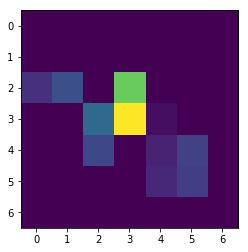

In [200]:
plt.imshow(a1[0,...,0])

In [201]:
a1.shape

(1, 7, 7, 512)

In [202]:
train = a1.reshape(1,-1)

In [203]:
train2 = np.fliplr(a1[0])

In [204]:
import matplotlib.pyplot as plt 

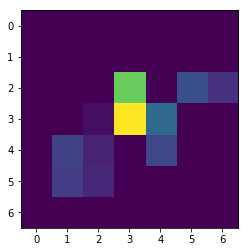

In [205]:
plt.imshow(train2[...,0])

In [206]:
te = train2[np.newaxis]

In [207]:
te.shape

(1, 7, 7, 512)

In [208]:
train = np.concatenate([a1,te]).reshape(2,-1)

In [209]:
test = np.array([0,1])

In [210]:
from sklearn.svm import SVC

# stacking : 데이터 결과들을 다시 학습시키는 것 

In [211]:
# 예측: 2차원 
svm = SVC()

In [212]:
svm.fit(train, test)

D:\01_Program\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

### RPN

- RPN: Region Proposal Network 
(conv layers) 학습을 통해 k anchor boxes를 선택한다. 

CNN -> Region Proposal Network(classification loss, Bounding-box regression loss)
-> RoI pooling(classification, Bounding-box regression loss) 

1. RPN classify object/ not object
2. RPN regress box coordinates 
3. Final classification score(object classes) 

# 2019년 12월 18일 (34일차)

## faster r-cnn 

- two steps (classification, regression)


- two steps를 end-to-end (안에 모델이 한개만 있는것)를 하기 위해서 selective search를 없앴다. 

In [9]:
from tensorflow.keras.applications import VGG16

In [10]:
vgg = VGG16()

In [11]:
vgg.summary()
# 차이점? 

# - feature extraction : fc layers 빼고
# fcnn_test_vgg: feature extraction하기 위해서 

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [12]:
import tensorflow as tf 

In [44]:
from tensorflow.keras.layers import TimeDistributed, Dense, Conv2D

In [2]:
from tensorflow.keras.models import Sequential

In [56]:
model = Sequential()

- TimeDistributed 

첫번째 인자를 시간 개념으로 따진다. (시간에 따른 것) 

?

In [57]:
model.add(TimeDistributed(Dense(1, kernel_initializer='ones'), input_shape=(1,28,28,1)))
# 60000,28,28이면 60000 이라는 시간이 지났을 때 처럼 [시간 개념으로 계산]
# 첫번째 인자를 시간 개념으로 따진다. (시간에 따른 것 )

In [58]:
model.add(TimeDistributed(Conv2D(16, (3,3), kernel_initializer='ones')))

In [60]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_14 (TimeDis (None, 1, 28, 28, 1)      2         
_________________________________________________________________
time_distributed_15 (TimeDis (None, 1, 26, 26, 16)     160       
Total params: 162
Trainable params: 162
Non-trainable params: 0
_________________________________________________________________


In [84]:
model = Sequential()

In [85]:
model.add(TimeDistributed(Conv2D(16,(3,3), kernel_initializer='ones'), input_shape=(1,28,28,1)))

In [86]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_24 (TimeDis (None, 1, 26, 26, 16)     160       
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [27]:
import numpy as np

In [28]:
x = np.array([[1,2],[3,4]])

In [5]:
4 + 4+ 6

14

In [6]:
14

14